---
title: "Assignment: Data Literacy with Python"
subtitle: "Group #1"
author: 
   - John Doe
   - Peggy Brown
affiliation: Lund University
date: last-modified
format:
  pdf
---

# Assignment
::: {.callout-important}
Before you start: 

1. Copy this notebook to your course folder (where you installed uv and have run the practicals)
2. Have a close look at the YAML on the very top of this notebook, and make sure the information there, including names and group number (= your Canvas self-assigned "Assignment Group"), is correct.

Prepare for submission:

1. Add code and text for solutions, including your reasoning, interpretations and conclusions
2. Render the final version of your notebook with quarto 
3. Submit final version of notebook together with rendered report
:::

## Libraries

In [1]:
import polars as pl
import polars.selectors as cs
from plotnine import *
from great_tables import GT

## Data
`AmesHousing` dataset, was published by [Dr. Dean De Cock](http://jse.amstat.org/v19n3/decock.pdf) (Truman State University) in 2011 as an alternative to the popular Boston Housing dataset. 
We will use selected (and in some cases transformed) variables from that dataset together with a complementing dataset with information from Ames' 5 public elementary schools. 

Data dictionaries is provided for you in the course website [LUDataLiteracy](https://lindahartman.github.io/LUDataLiteracy/Ames_houses.html).

In [2]:
ames_houses = pl.read_csv("https://bit.ly/data24ameshousing")
ames_schools = pl.read_csv("https://bit.ly/data24amesschools")


## Glossary

- **Total living area (TLA)** includes all finished area of the house and 50% of the unfinished area of the house.
- **Price per total living area (PTLA)** is sales price of the house divided by the total living area

## Challenge 1

::: {.callout-warning}
### Assignment

Each of the houses in the Ames dataset belongs to one of the sub-classes defined by Ames municipal classification system. We are interested in finding out how the prices per sqf (PTLA) vary across various types of real estate properties, as defined by the sub-class.


- Visualize the range of PTLA for each property type using a boxplot. **Plus-level:** order the boxplots from highest to lowest median PTLA.
    - Which type of real estate has the highest median PTLA? Lowest PTLA?

:::

::: {.callout-tip}
In Plotnine `reorder(x, y)` orders results for categories of variable `x` based on  (median of) `y` (within each level of `x`).

:::


### Solution


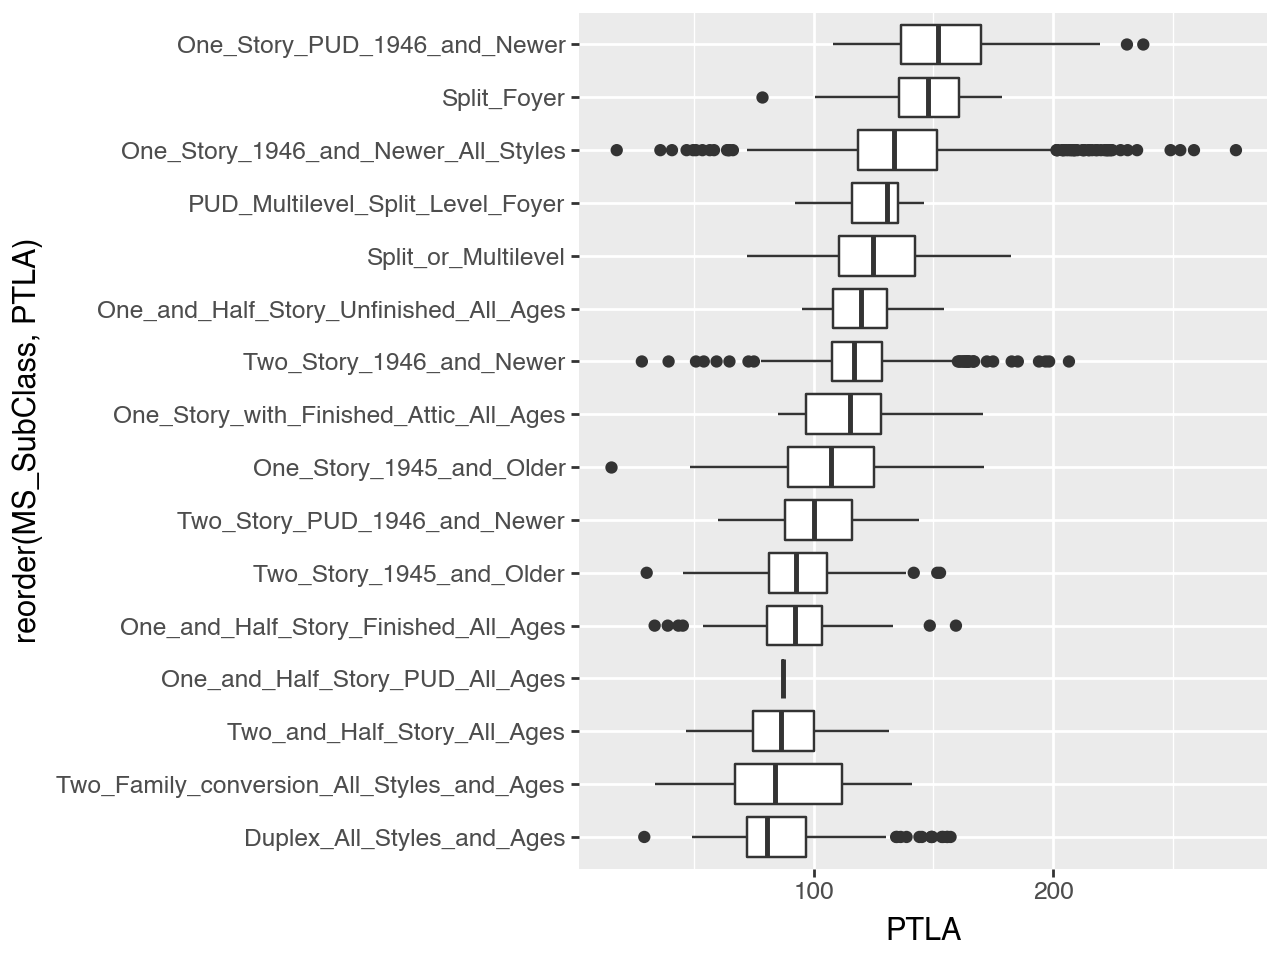

In [10]:
#| label: solution1
# Write your code here. 
# Add more cells if you need.

(
    ames_houses
    .with_columns(PTLA=pl.col("Sale_Price")/pl.col("Gr_Liv_Area"))
    .pipe(ggplot) +
    geom_boxplot(aes(x="reorder(MS_SubClass, PTLA)", y="PTLA")) +
    coord_flip(expand=True)
    
    
)

# Highest median: One_STory_PUD_1946_and_Newer
# Lowest median: Duplex_All_Styles_and_Ages

## Challenge 2.
Trend and volatility are an important concepts in understanding and describing different markets.   

::: {.callout-warning}
### Assignment
- Visualize the development of the median monthly PTLA for each building type (One family, Two family condo, etc.) using line plot. Would you say that prices for certain house types are on decline (in terms of median monthly PTLA)?
-  Which of the house types exhibit higher volatility over the period in terms of inter-quartile range (IQR) of monthly median PTLA?  Confirm your conclusion using a boxplot. **Plus-level:** For each building type include only months with 3 or more sales.

:::


/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:342: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:342: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:342: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/melkerliljegren/Documents/Python Repositories/Data-Literacy-with-Python-MNXB08/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:342: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/melkerliljegren/Documents/Python Repo

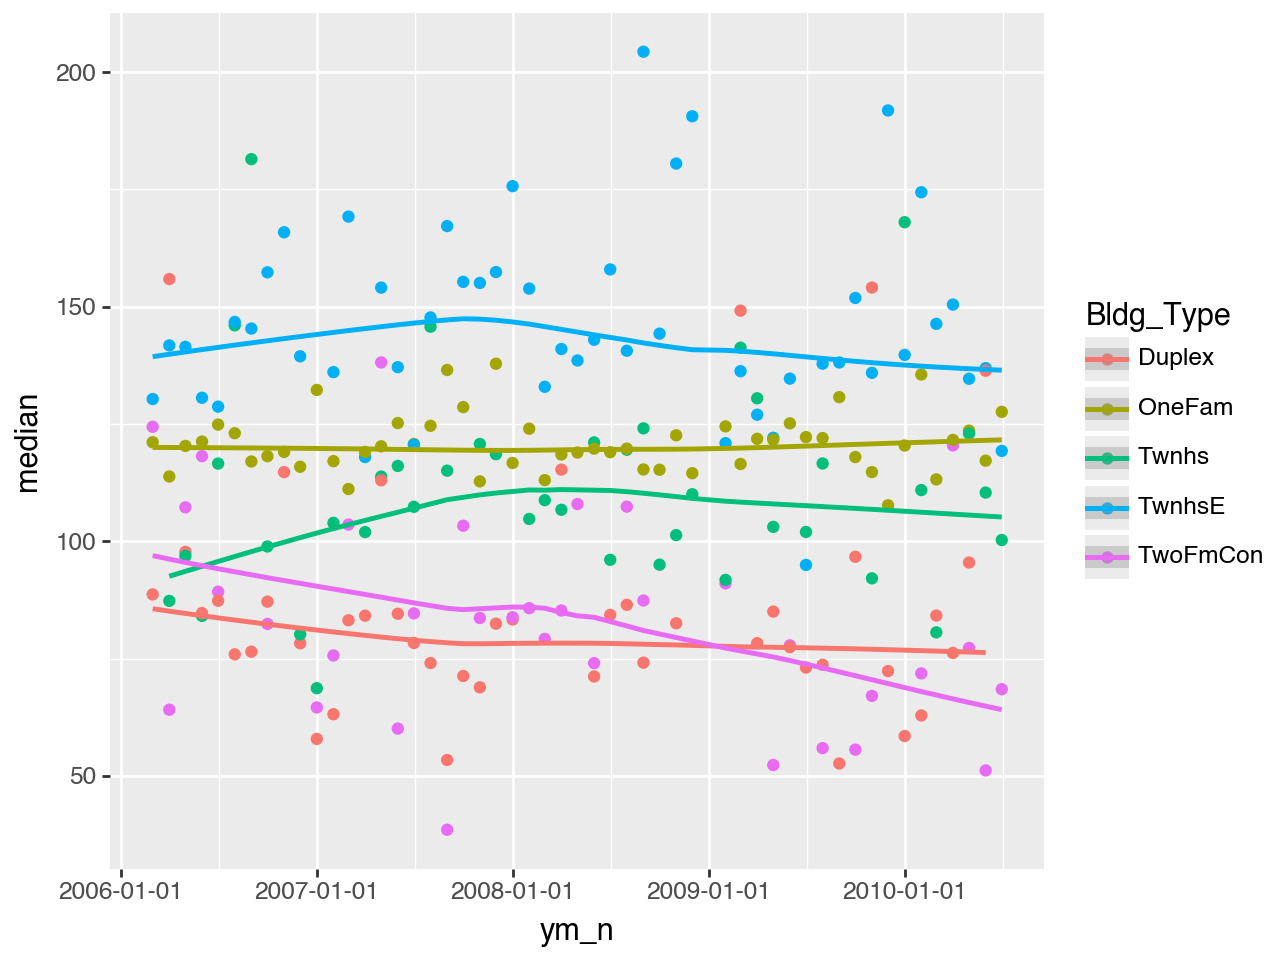

In [56]:
#| label: solution2
# Write your code here. 
# Add more cells if you need.

(
    ames_houses
    .with_columns(PTLA=pl.col("Sale_Price")/pl.col("Gr_Liv_Area"))
    .with_columns(ym_n=(pl.col("YM_Sold")).str.strptime(pl.Date()))
    .group_by("Bldg_Type", "ym_n")
    .agg(median=pl.col("PTLA").median())
    .filter(pl.len().over("ym_n") >= 3)
    .pipe(ggplot, aes(x="ym_n", y="median", color="Bldg_Type")) +
    geom_point() +
    geom_smooth()
)

# TwoFmCon are on decline regarding price

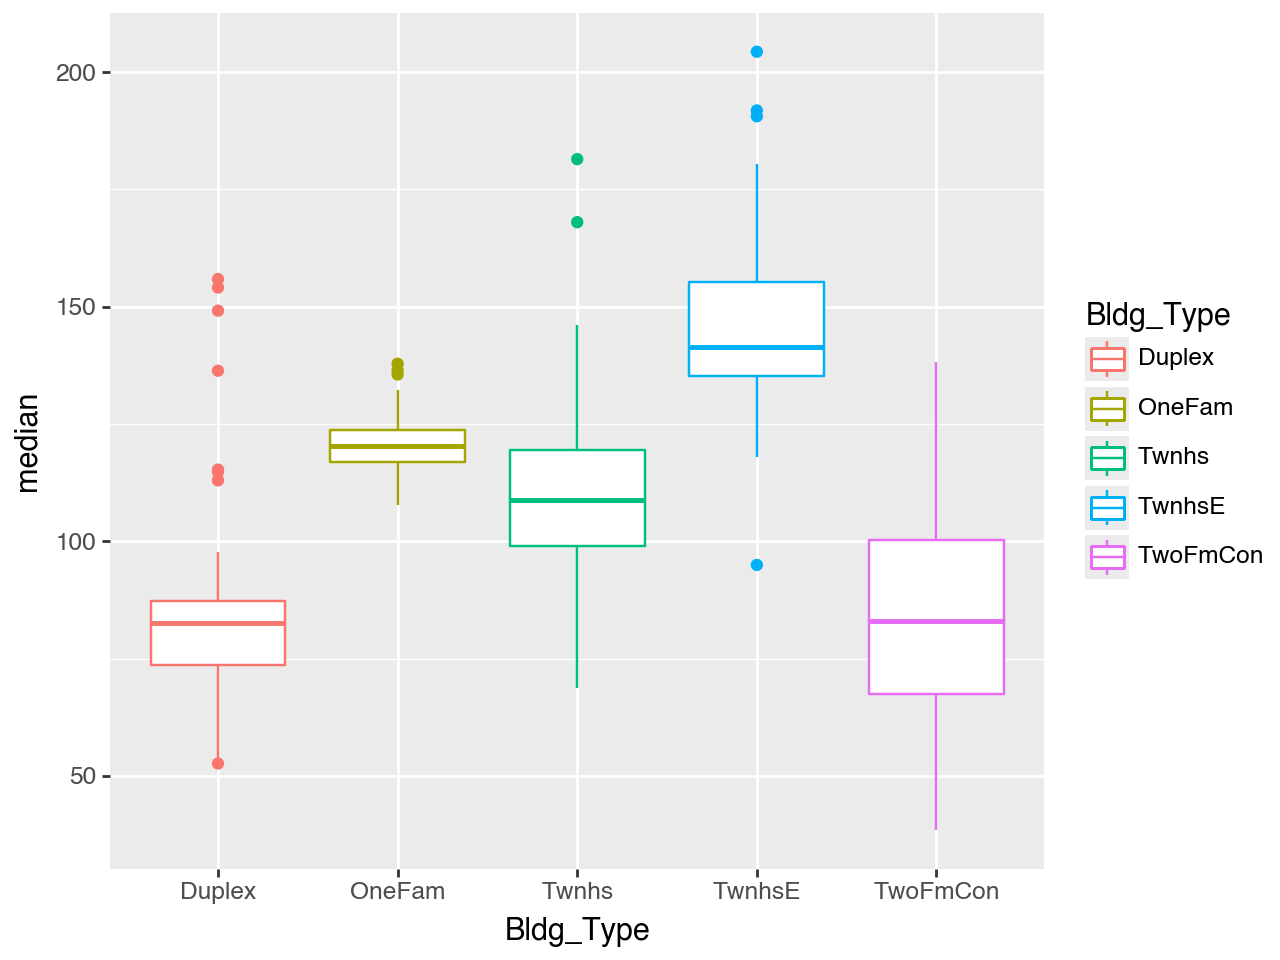

In [57]:
(
    ames_houses
    .with_columns(PTLA=pl.col("Sale_Price")/pl.col("Gr_Liv_Area"))
    .with_columns(ym_n=(pl.col("YM_Sold")).str.strptime(pl.Date()))
    .group_by("Bldg_Type", "ym_n")
    .agg(median=pl.col("PTLA").median())
    .filter(pl.len().over("ym_n") >= 3)
    .pipe(ggplot, aes(x="Bldg_Type", y="median", color="Bldg_Type")) +
    geom_boxplot()
)

In [59]:
(
    ames_houses
    .with_columns(PTLA=pl.col("Sale_Price")/pl.col("Gr_Liv_Area"))
    .group_by("Bldg_Type", "YM_Sold")
    .agg(median=pl.col("PTLA").median())
    .filter(pl.len().over("YM_Sold") >= 3)
    .group_by("Bldg_Type")
    .agg(iqr=pl.col("median").quantile(0.75) - pl.col("median").quantile(0.25))
)
# We can now see from both the boxplot and our values that TwoFmCon has the highest IQR.

Bldg_Type,iqr
str,f64
"""Duplex""",13.651442
"""TwnhsE""",19.397461
"""OneFam""",6.58156
"""Twnhs""",20.619221
"""TwoFmCon""",36.269844



## Challenge 3.

A partially sold house usually refers to a property where only a portion of the ownership has been transferred to another party, rather than the entire property being sold, eg. for sharing ownership, inheritance division or in real estate investment.


::: {.callout-warning}
### Assignment

- Create a great looking table reporting the total livable area, garage size, and lot area for houses that were partially sold versus houses sold under all other sales conditions.
- Add a column showing the size difference of partially sold houses compared to regular sales in percent.
- **Plus-level:** Create the table using `pivot()` and `unpivot()`. 
  
:::

:::{.callout-tip}
Partially sold houses satisfy
`pl.col("Sale_Condition").is_in(["Partial", "AdjLand"]))`, that you can use in `pl.when().then().otherwise()`
:::

### Solution

In [142]:
#| label: solution3
# Write your code here. 
# Add more cells if you need.

partial_sold = (
    ames_houses
    .with_columns(Partial=pl.when(pl.col("Sale_Condition").is_in(["Partial", "AdjLand"])).then(pl.lit("True")).otherwise(pl.lit("False")))
    .group_by("Partial")
    .agg(TLA=(pl.col("Gr_Liv_Area") + pl.col("Total_Bsmt_SF") - (pl.col("Bsmt_Unf_SF") * 0.5)).mean(), 
         Garage_Area=pl.col("Garage_Area").mean(),
         Lot_Area=pl.col("Lot_Area").mean())
    .melt(id_vars="Partial",
          variable_name="Measure",
          value_name="Value")
    .pivot(values="Value",
          index="Measure",
          columns="Partial")
    .with_columns(((pl.col("True") - pl.col("False")) / pl.col("False") * 100).alias("diff_pct"))
 )


partial_sold


/var/folders/r6/jv1hv35d4rg8crmf3xb99ykc0000gn/T/ipykernel_57394/2594887203.py:12: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
/var/folders/r6/jv1hv35d4rg8crmf3xb99ykc0000gn/T/ipykernel_57394/2594887203.py:15: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.


Measure,False,True,diff_pct
str,f64,f64,f64
"""TLA""",2228.753461,2715.07393,21.82029
"""Garage_Area""",456.560045,640.093385,40.199168
"""Lot_Area""",10077.402918,10881.373541,7.977955



## Challenge 4.
Ames is split in 5 school districts (for elementary schools). 

::: {.callout-warning}
### Assignment

Explore how distance to elementary schools vary across the five school districts in Ames.  

- Compare the distributions of distance to school between districts, both using boxplot and density plots.
- Which visualization  do you prefer?

:::

:::{.callout-tip}
The distance between two locations with coordinates (x1,y1) and (x2,y2) (in the plane) can be calculated as `sqrt((x1-x2)^2 + (y1-y2)^2)` 

:::

### Solution

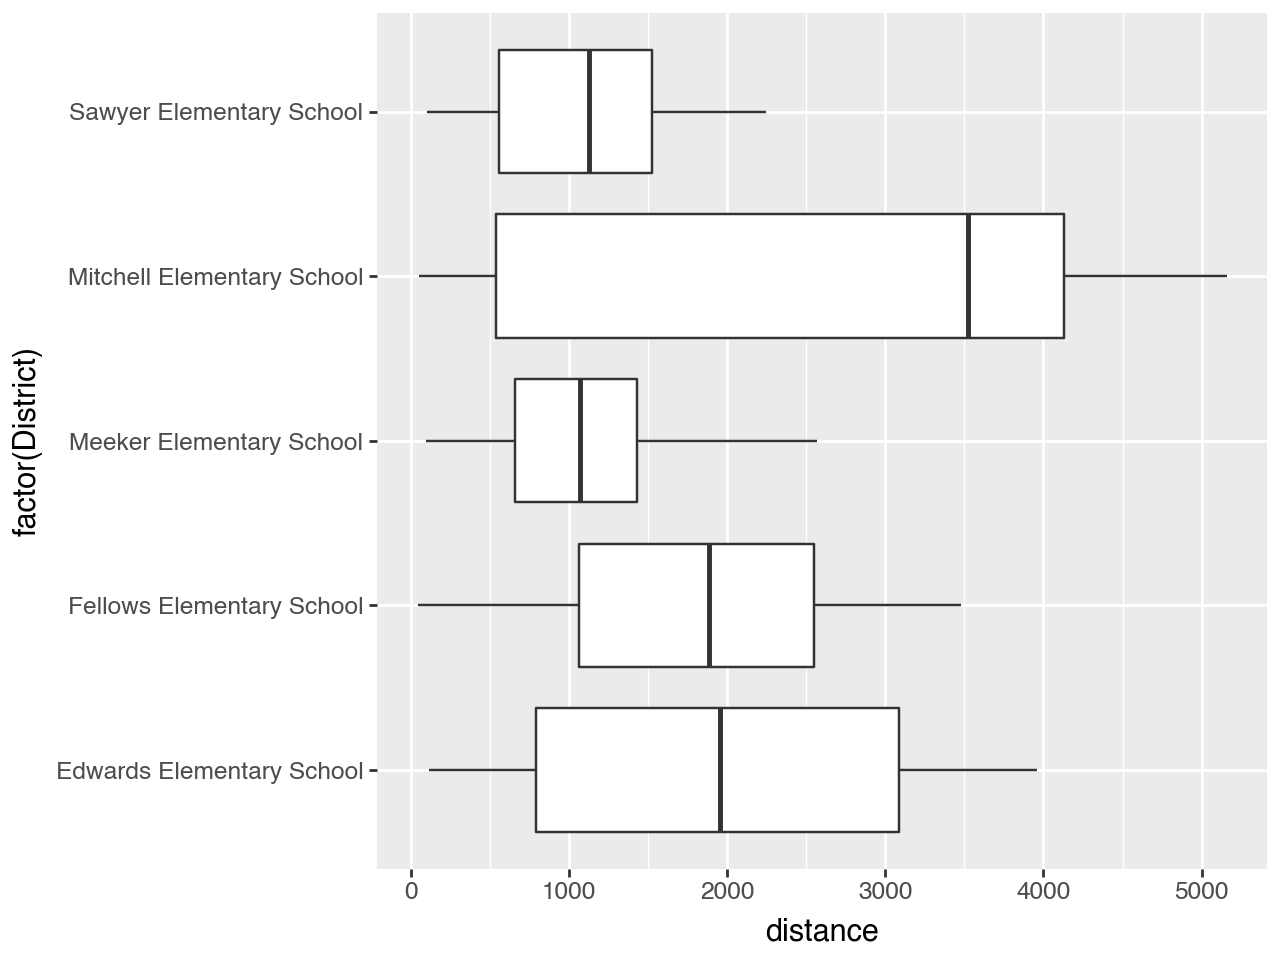

In [135]:
#| label: solution4
# Write your code here. 
# Add more cells if you need.

df_avg_distance = (
    ames_houses
    .with_columns(District=pl.col("School_District"))
    .join(ames_schools, on="District")
    .with_columns(distance=((pl.col("UTM_x")-pl.col("UTM_x_right"))**2 + (pl.col("UTM_y")-pl.col("UTM_y_right"))**2).sqrt())
)

(
    ggplot(df_avg_distance, aes(x="factor(District)", y="distance")) +
    geom_boxplot() +
    coord_flip()
)


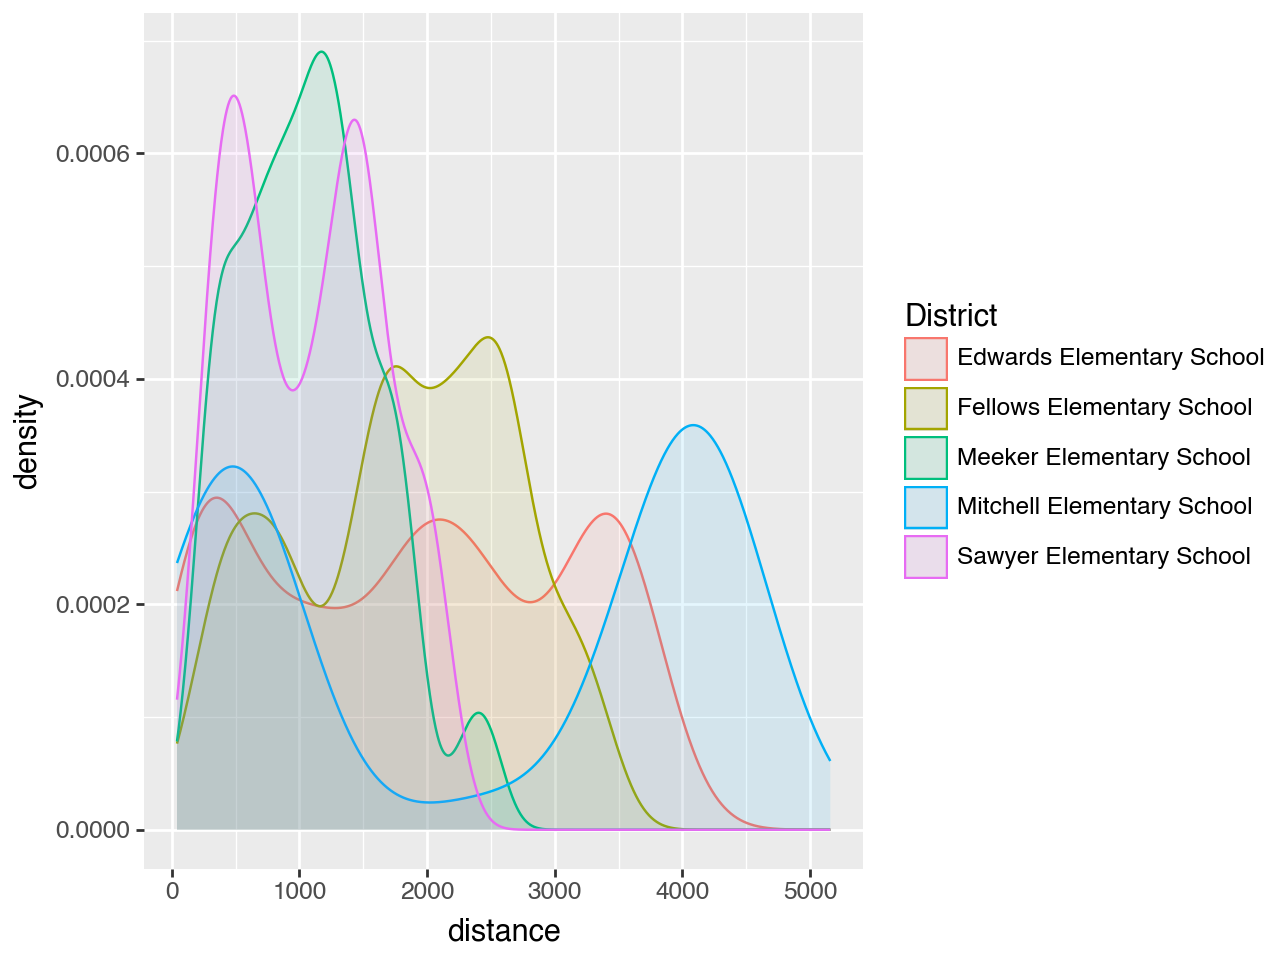

In [139]:
(
    ggplot(df_avg_distance, aes(x="distance", color="District", fill="District")) +
    geom_density(alpha=0.1)
)